<a href="https://colab.research.google.com/github/robertbarac/EDA-Wines/blob/main/EDA_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA red & white wines/ Análisis Exploratorio de Datos con vinos rojos y blancos. 🍇🍇

Let's import the libraries needed to work

In [ ]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, pearsonr
from mpl_toolkits.mplot3d import Axes3D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
%matplotlib inline

plt.style.use('seaborn')

Vamos a leer los DataFrames de vino blanco y tinto

We are going to read the white and red wine DataFrames...

Aquí debajo están los links de los datasets de vino

In [2]:
url_red_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white_wine = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

In [3]:
df_red = pd.read_csv(url_red_wine, delimiter=';')
df_white = pd.read_csv(url_white_wine, delimiter=';')

Let's see the numbers of columns:

In [4]:
df_red.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df_white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df_red.shape

(1599, 12)

In [7]:
df_white.shape

(4898, 12)

## Conceptos de los parámetros del vino/ Concepts of Wine Parameters

**Fixed acidity/Acidez fija**: Es el conjunto de ácidos naturales del vino (tartárico, málico, cítrico, succínico y láctico). El más importante de todos ellos es el ácido tartárico, la medición de la acidez fija se hace en gramos de éste por litro(g/L).

**Volatile acidity/Acidez volátil**: Proviene de los ácidos de cadena corta de la serie acética (acético, fórmico, propiónico, butírico) y de algunas de sus combinaciones como el acetato de etilo originados durante la fermentación. Se mide en g/L. _Como químico puedo decir que a mayor concentración de la acidez volátil, el sabor del vino desmejora y esto afecta directamente la calidad del vino_. Lo podremos comprobar o refutar más adelante en el análisis.

**Citric acid/Ácido cítrico**: Concentración de ácido cítrico en g/L.

**Residual sugar/Azúcar residual**: El azúcar residual es la cantidad total de azúcar que queda en el vino que no ha sido fermentada por las levaduras, y parte de ese azúcar no fermentado son las Pentosas, azúcares presentes en el vino en concentraciones cercanas a 1 gramo por litro de mosto.

**Free sulfur dioxide/dióxido de azufre libre**: Mide la cantidad de dióxido de azufre (SO2) en forma libre en g/L.

**Total solfur dioxide/Dióxido de azufre total**: Mide la cantidad total de dióxido de azufre en el vino. El SO2 es indispensable en la elaboración y conservación de vinos. Permite obtener vinos menos oxidados, con mejor color y aroma, menor acidez volátil, debido a sus efectos como antoxidante, antimcrobiano. _Pero esto no quiere decir que cuanto más SO2 se use, mejor calidad, depende de varios factores_. Por ejemplo, el límite de SO2 sube o baja dependiendo de si el azúcar residual es alto o no. Mucho SO2 sin nada a lo que impedir su oxidación puede alterar el aroma y el sabor del vino, lo que afecta su calidad.

**Density/Densidad**: La densidad es una medida de cuánta masa está 'concentrada' por unidad de volumen.

**pH**: Indica la concentración e iones de hidrógeno(protones) en el vino. El rango de este valor está entre 0 y 14, donde el 0 indica alta acidez y el 14 alta basicidad. Un pH de 7 sería pH neutro, lo que indica que hay igual concentración de iones hidrógeno H+ que de iones hidroxilo OH-.

**Sulphates/Sulfatos**: Los sulfatos de sodio y calcio aparecen en el agua y por lo tanto la uva y el vino pueden contenerlos.

**Alcohol**: Indica el porcentaje volumen-volumen en el vino.

**Quality/Calidad**: Se rankea de 1 a 10. A mayor valor, mayor calidad.

Di con lo anterior un panorama conceptual sobre las columnas que están en el dataset. Veamos ahora algunas estadísticas básicas de los datos...

## Descriptive Statistics / Estadística Descriptiva

Veamos

In [8]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
df_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [11]:
df_red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

**No hay columnas con valores nulos. Ambos datasets está limpios.**

**There is no missing values.**

In [12]:
df_red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
df_white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [14]:
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [15]:
df_white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


**Importante**: Debo anotar que la calidad tiene sí o sí que ver con el tipo de vino, más con el tipo de uva. Los niveles de ácidos y azúcares son muy diferentes de una uva verde respecto de una uva roja. Por lo que considero mejor tratar ambos tipos de uvas por separado. Hay muchas más razones para tomar esta decisión, como por ejemplo que la cantidad de SO2 varía si es para vinos blancos o tintos.

## Red Wine Analysis/Análisis de Vino Rojo 🍷🍷

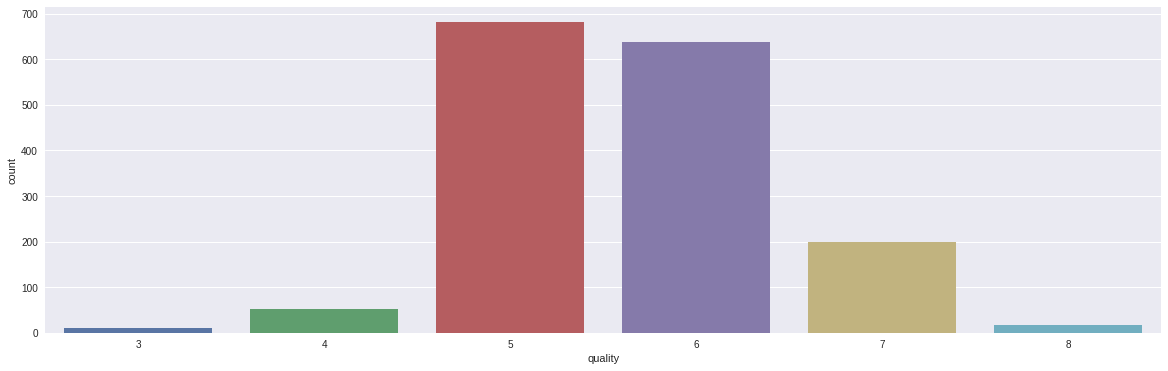

In [16]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_red, x='quality')
plt.show()

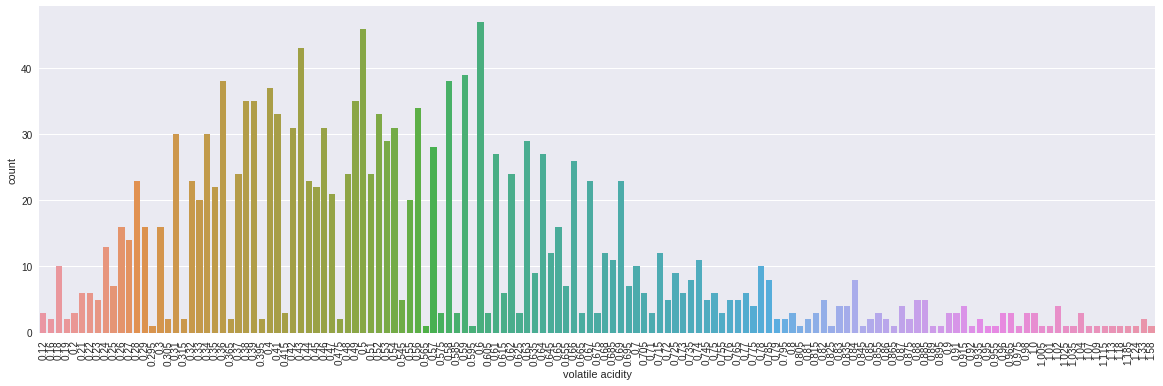

In [17]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_red, x='volatile acidity')
plt.xticks(rotation=90)
plt.show()

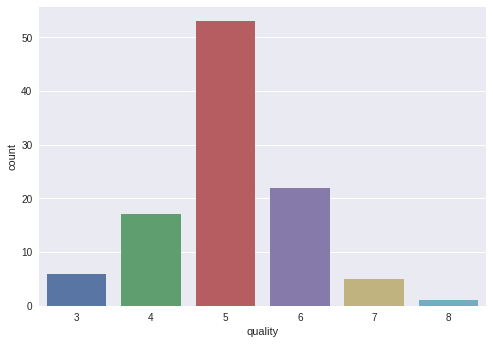

In [18]:
sns.countplot(data = df_red[df_red['volatile acidity'] > 0.8], x='quality')

Podemos ver que la calidad de estos vinos en su mayoría están en 5, 6 y 7.

### Encontrar columnas correlacionadas
Debemos encontrar cuáles de las columnas del dataset del vino rojo tienen una alta correlación. En especial, queremos ver qué parámetros se correlacionan positivamente en la calidad del vino.

In [19]:
df_red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


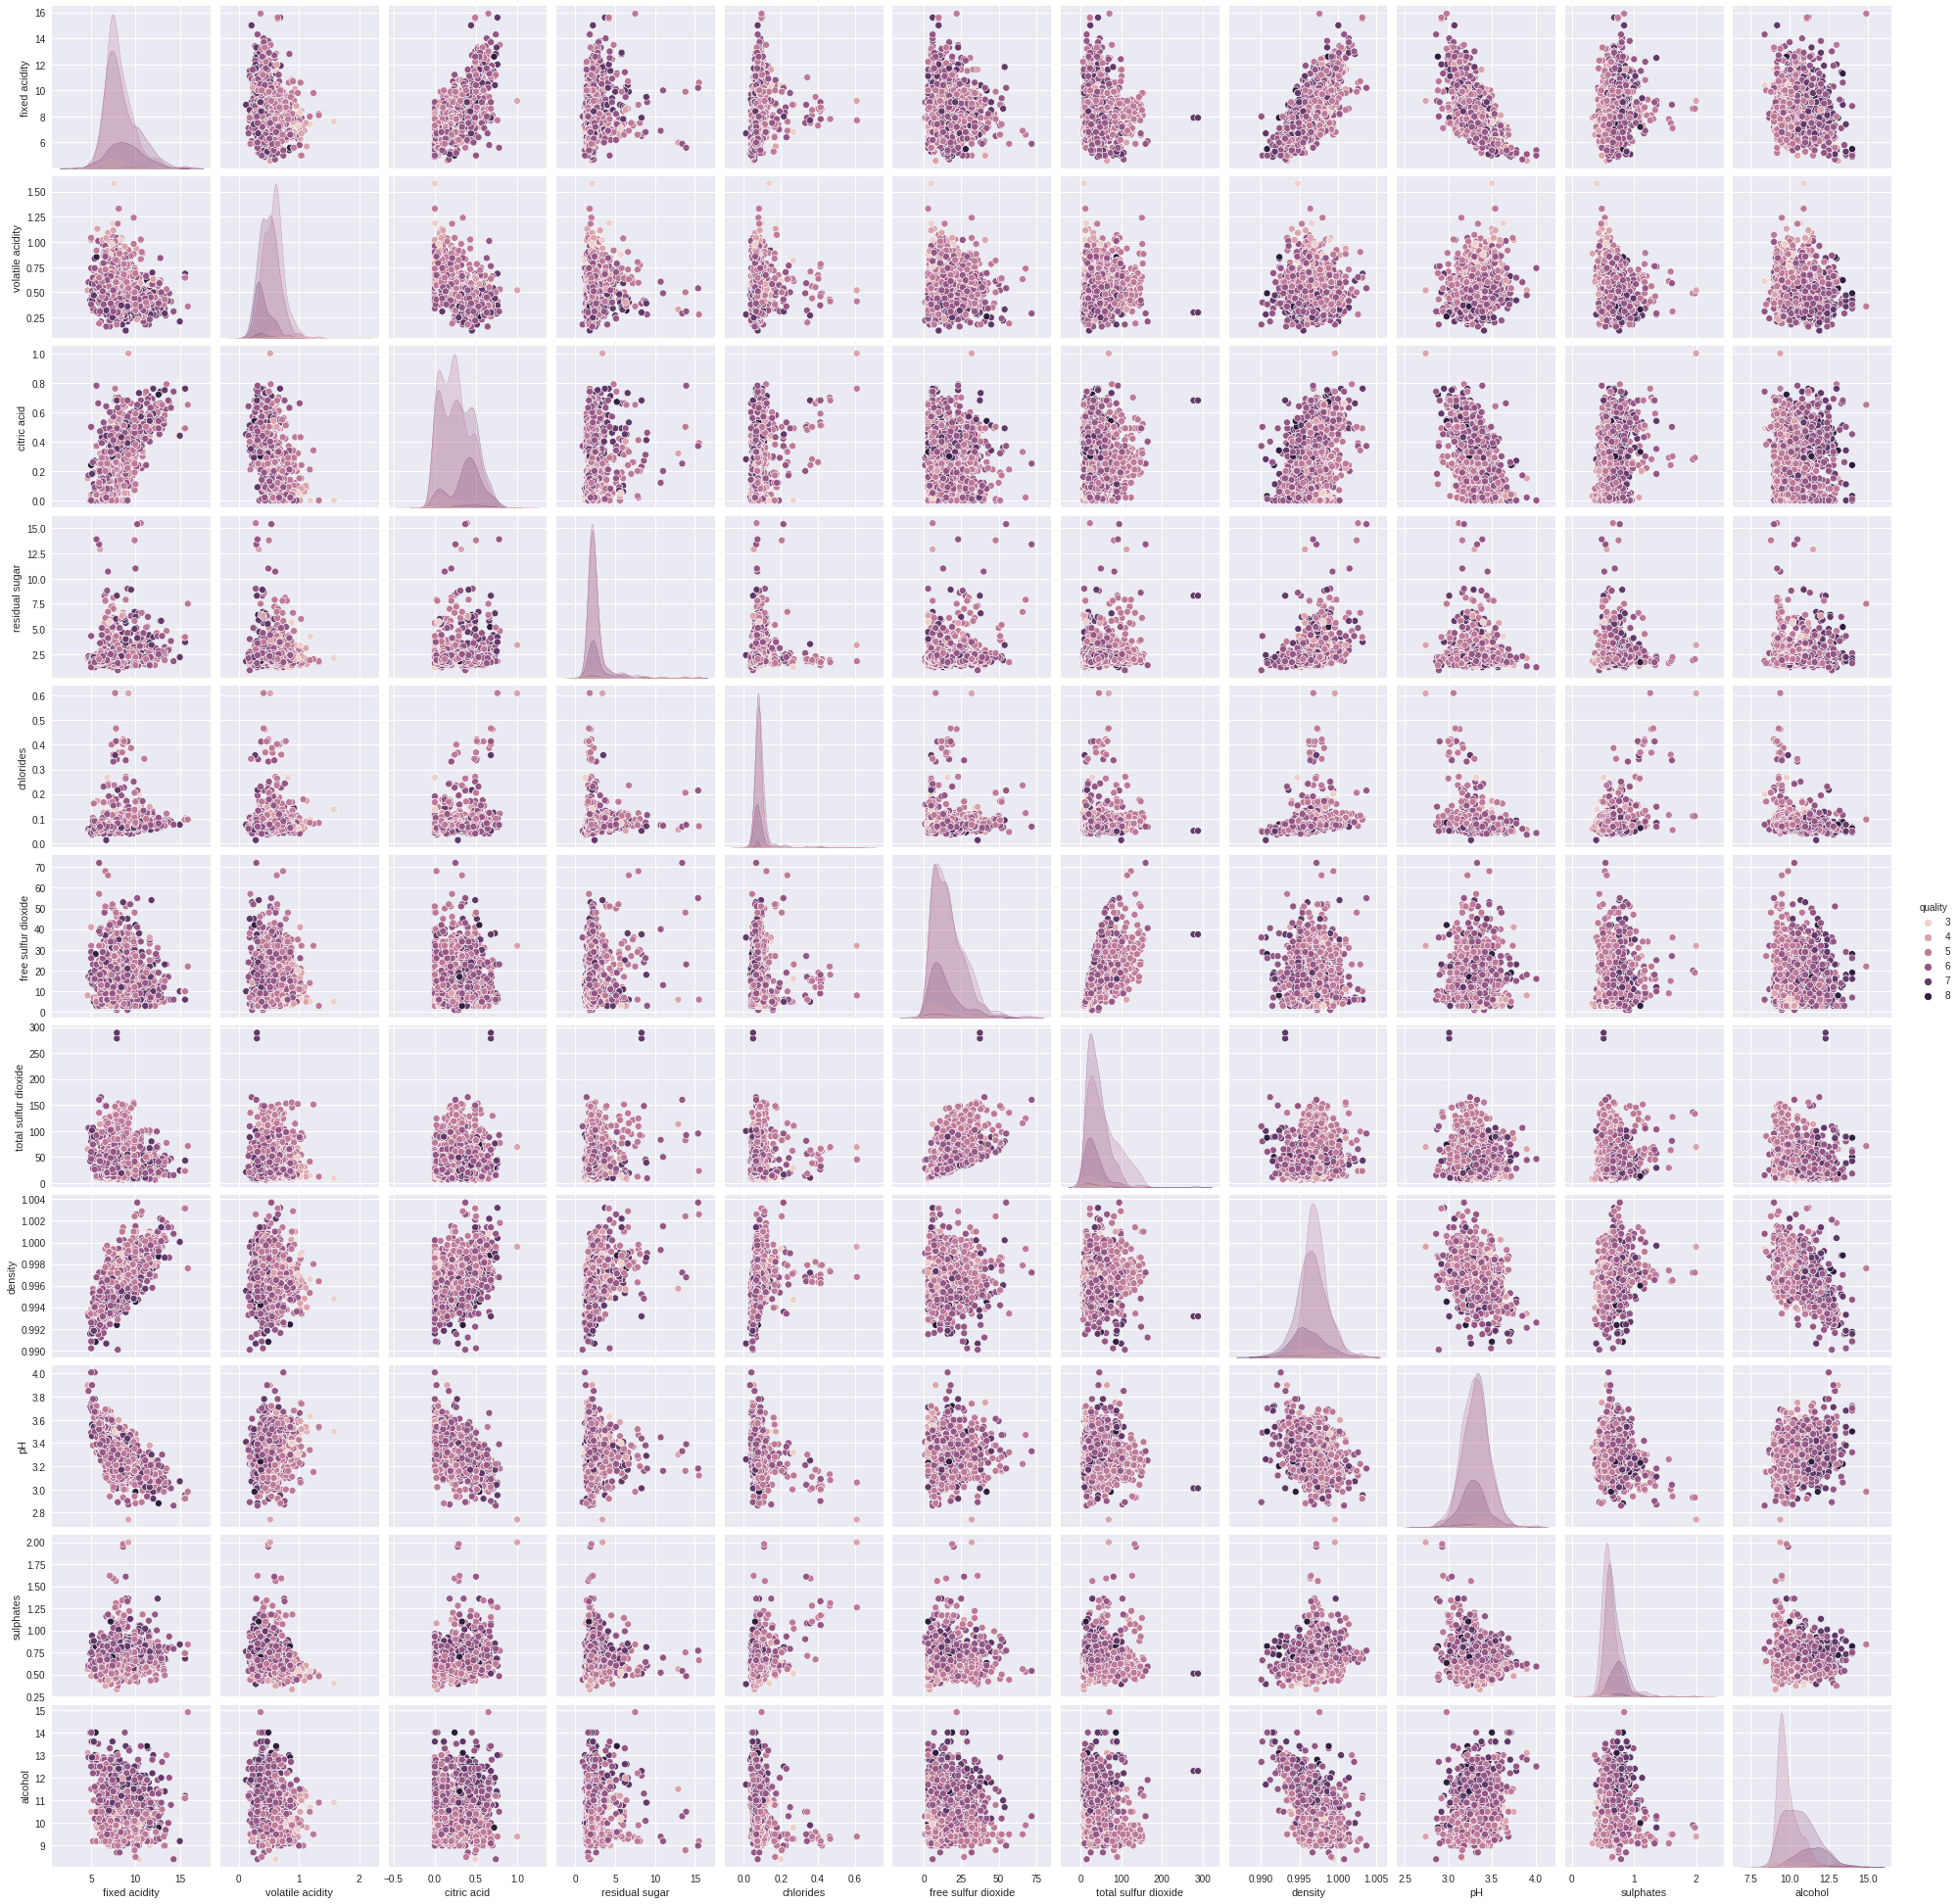

In [ ]:
sns.pairplot(df_red, hue='quality')
plt.show()

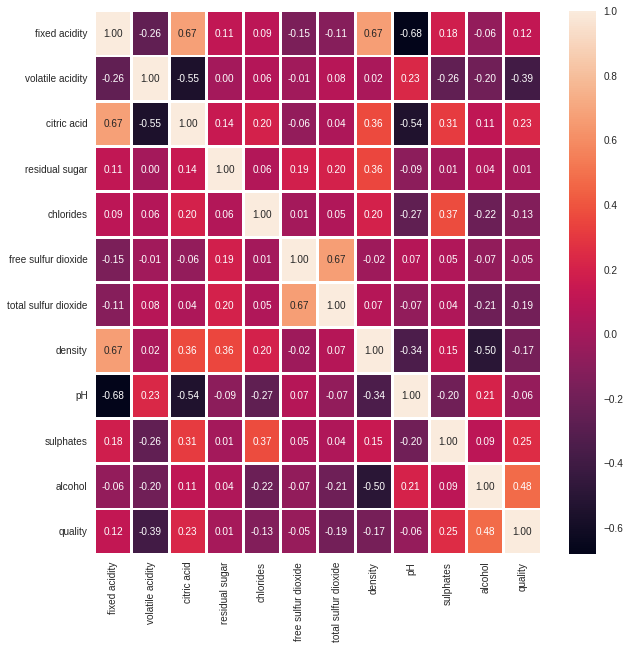

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(data=df_red['quality', 'alcohol', 'pH', ''].corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

Luego de ver la correlación en número, en pairplot y en mapa de calor, podemos decir ciertas cosas:
- _El alcohol tiene una correlación positiva con la calidad del vino rojo_
- _La acidez volátil tiene una correlación negativa con la calidad del vino_. Esto es lógico con respecto a lo que dijimos anteriormente en base a conocimientos químicos básicos. La acidez volátil, que se compone por lo general de ácido acético(el ácido y el motivo del olor del vinagre), lo cual le desmejora el sabor al vino.
- La densidad dismuye al aumentar los grados de alcohol del vino.
- El pH puede volverse más básico al aumentar el grado de alcohol(débil correlación positiva).
- _El pH tiene una correlación negativa con los parámetros de acidez fija y ácido cítrico_.
- _El ácido cítrico hace parte de la medición de la acidez fija_.

Hay muchas más conclusiones que podemos sacar del mapa de calor. Pero es importante que veamos la significancia de la correlación y cómo ella puede beneficiarnos a la hora de decidir conjuntos de características.

**Veamos la distribución de los grados de alcohol**

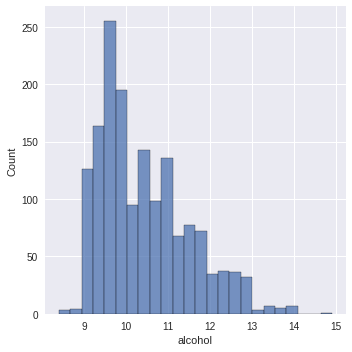

In [20]:
sns.displot(df_red['alcohol'])
plt.show()

In [21]:
skew(df_red['alcohol'])

0.8600210646566755

El alcohol tiene un sesgo positivo. Los datos están mas agrupados hacia la izquierda.

Esto es posible hacerlo con las 11 columnas restantes y ver su sesgo.

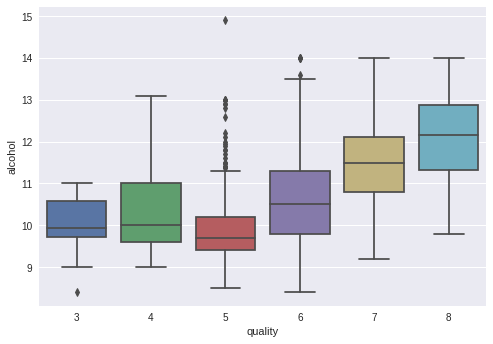

In [22]:
sns.boxplot(data=df_red, x='quality', y='alcohol')
plt.show()

**Vemos con claridad que la calidad del vino aumenta al aumentar los grados del alcohol**.

_En vinos de calidad 5 hay muestras de vino con altos grados de alcohol que no influyen en la calidad final_. Sería interesante ver esos outliers y ver qué otras variables están afectando la calidad del vino.

Veamos ahora Quality vs Sulphates

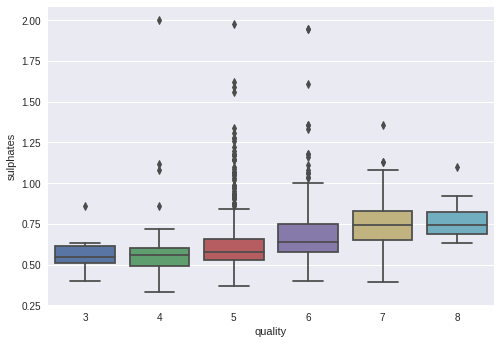

In [23]:
sns.boxplot(data=df_red, x='quality', y='sulphates')
plt.show()

Los sulfatos ayudan en la calidad del vino pero no lo determinan.

### Alcohol vs pH

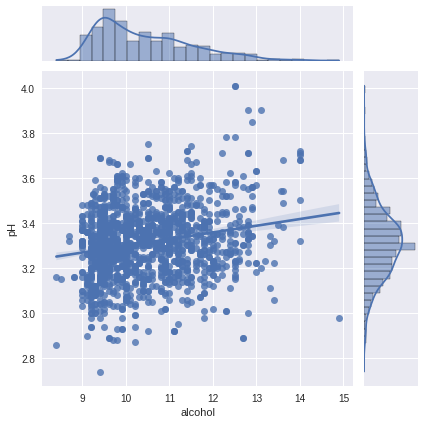

In [24]:
sns.jointplot(data=df_red, x='alcohol', y='pH', kind='reg')
plt.show()

En este gráfico se muestra la débil correlación que hay ya vimos en el heatmap entre el alcohol y el pH.

In [25]:
def obtener_correlacion(col1, col2, df):
  pearson_corr, p_value = pearsonr(df[col1], df[col2])
  print("Correlación entre {} y {} es {}".format(col1, col2, pearson_corr))
  print("El p-valor de esta correlación es {}".format(p_value))

In [26]:
obtener_correlacion('alcohol', 'pH', df_red)

Correlación entre alcohol y pH es 0.20563250850549825
El p-valor de esta correlación es 9.96449774146556e-17


El p-valor nos permite aceptar la prueba.

## Analyzing White Wine/Analizando Vino Blanco

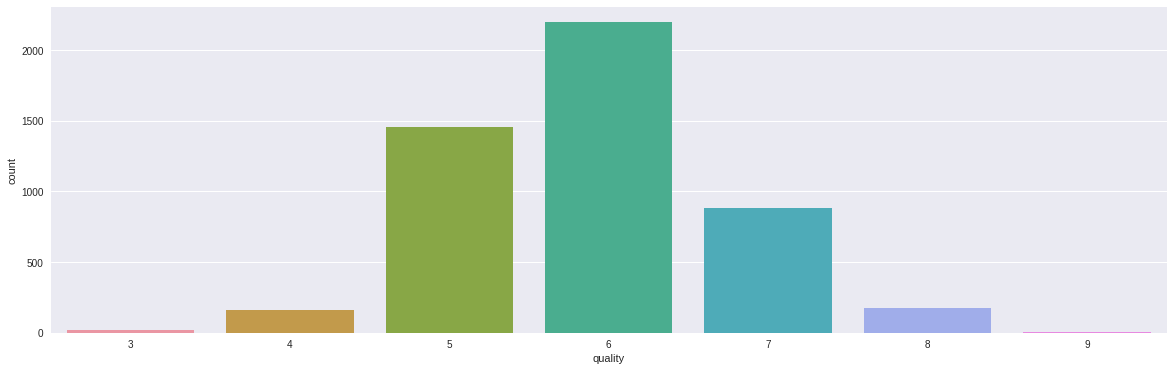

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(data=df_white, x='quality')
plt.show()

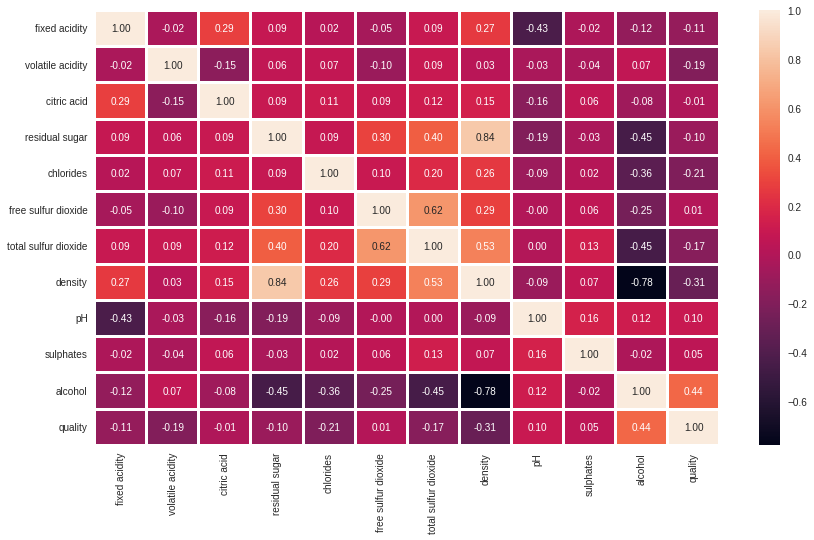

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(data=df_white.corr(), annot=True, fmt='.2f', linewidths=2)
plt.show()

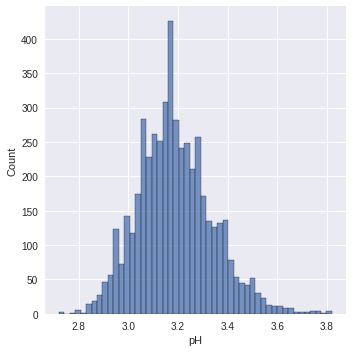

In [ ]:
sns.displot(df_white['pH'])

**Podemos ver que el heatmap del vino blanco tiene unas correlaciones distintas, específicamente hablando de las que estuvimos analizando.**

- _El pH y el alcohol tiene una correlación más débil aún_
- _El alcohol sigue con corrlación positiva a la calidad del vino aunque un poco más baja que la del vino rojo_
- _La correlación negativa entre la acidez volátil y la calidad baja respecto del vino tinto_.
- _La densidad está más fuertemente correlacionada a los grados de alcohol_.
- _El pH ya no está tan relacionado con los grados de alcohol ni con la acidez fija y el ácido cítrico, esto puede ser por la pérdida de correlación entre la acidez fija y el ácido cítrico_(0.67 en el tinto y 0.29 en el blanco). ¿Será que esto quiere decir que los niveles de ácido cítrico en el vino blanco son menores a los del vino tinto?

### ¿Los niveles de ácido cítrico en el vino blanco son menores a los del vino tinto??

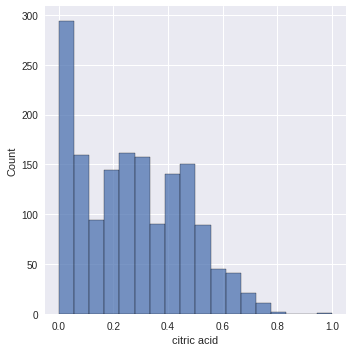

In [28]:
sns.displot(df_red['citric acid'])

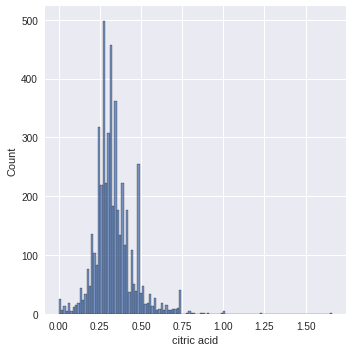

In [29]:
sns.displot(df_white['citric acid'])

Se confirma que como en el vino blanco hay menos niveles de ácido cítrico respecto del vino tinto, esto reduce la relación con la acidez fija, lo cual a su vez permite que el valor de correlación con el pH aumente. Al final la correlación positiva de pH y calidad del vino bajan aún mas de lo que ya era. **Estas cosas y demás profundidades del tema no se podrían discutir si se hace un merge entre los DataFrames de vino tinto y blanco**.

**Definamos una columna para categoría de los vinos:**

In [30]:
df_red['category'] = 'red'
df_white['category'] = 'white'

In [31]:
print('VINO TINTO: Lista de calidad', sorted(df_red['quality'].unique()))
print('VINO BLANCO: Lista de calidad', sorted(df_white['quality'].unique()))

VINO TINTO: Lista de calidad [3, 4, 5, 6, 7, 8]
VINO BLANCO: Lista de calidad [3, 4, 5, 6, 7, 8, 9]


**Ahora vamos a clasificar por vinos de calidad baja, media y alta según el número de la columna quality:**

In [32]:
df_red['quality_label'] = df_red['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_red['quality_label'] = pd.Categorical(df_red['quality_label'], categories=['low', 'medium', 'high'])

In [33]:
df_white['quality_label'] = df_white['quality'].apply(lambda value: ('low' if value <= 5 else 'medium') if value <= 7 else 'high')
df_white['quality_label'] = pd.Categorical(df_white['quality_label'], categories=['low', 'medium', 'high'])

In [34]:
df_red['quality_label'].value_counts()

medium    837
low       744
high       18
Name: quality_label, dtype: int64

In [35]:
df_white['quality_label'].value_counts()

medium    3078
low       1640
high       180
Name: quality_label, dtype: int64

In [57]:
df_white = df_white[0:1599]

In [58]:
wines = df_red.merge(df_white, how='outer')
wines.shape

(3198, 14)

Pero esto hace que queden primero las filas de vino tinto y después las más de 4mil filas de vino blanco. Vamos a barajar el dataset para que se aleatorizen los datos...

In [37]:
wines = wines.sample(frac=1.0, random_state=42).reset_index(drop=True)
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,medium


In [ ]:
subset_attr = ['alcohol', 'density', 'pH', 'quality']
low = round(wines[wines['quality_label'] == 'low'][subset_attr].describe(), 2)
medium = round(wines[wines['quality_label'] == 'medium'][subset_attr].describe(), 2)
high = round(wines[wines['quality_label'] == 'high'][subset_attr].describe(), 2)

In [ ]:
pd.concat([low, medium, high], axis=1,
keys=['👎 Low Quality Wine',
'👍 Medium Quality Wine',
'👌 High Quality Wine'])

👎 Low Quality Wine                            👍 Medium Quality Wine  \
                 alcohol  density       pH  quality               alcohol   
count            2384.00  2384.00  2384.00  2384.00               3915.00   
mean                9.87     1.00     3.21     4.88                 10.81   
std                 0.84     0.00     0.16     0.36                  1.20   
min                 8.00     0.99     2.74     3.00                  8.40   
25%                 9.30     0.99     3.11     5.00                  9.80   
50%                 9.60     1.00     3.20     5.00                 10.80   
75%                10.40     1.00     3.31     5.00                 11.70   
max                14.90     1.00     3.90     5.00                 14.20   

                                 👌 High Quality Wine                          
       density       pH  quality             alcohol density      pH quality  
count  3915.00  3915.00  3915.00              198.00  198.00  198.00  198.00  
mean      0.99     3.22     6.28               11.69    0.99    3.23    8.03  
std       0.00     0.16     0.45                1.27    0.00    0.16    0.16  
min       0.99     2.72     6.00                8.50    0.99    2.88    8.00  
25%       0.99     3.11     6.00               11.00    0.99    3.13    8.00  
50%       0.99     3.21     6.00               12.00    0.99    3.23    8.00  
75%       1.00     3.33     7.00               12.60    0.99    3.33    8.00  
max       1.04     4.01     7.00               14.00    1.00    3.72    9.00

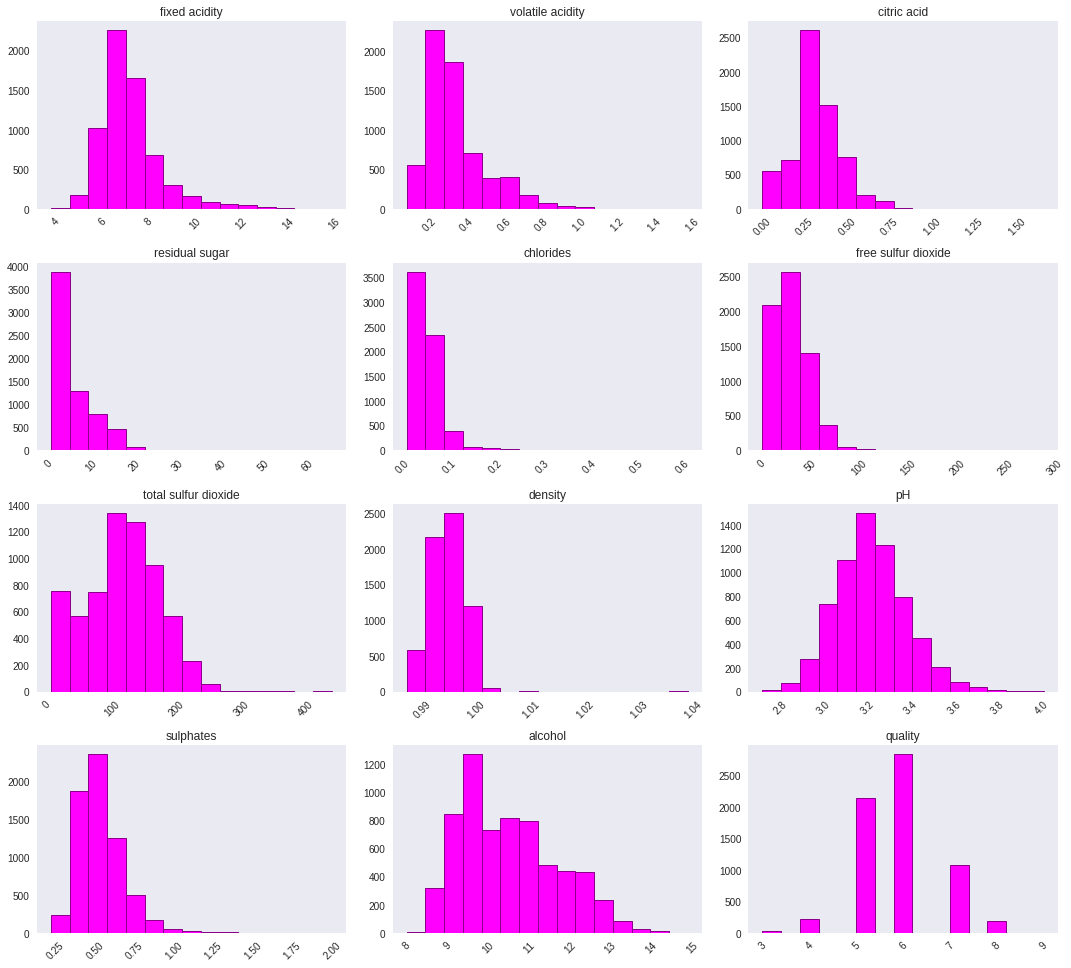

In [ ]:
fig = wines.hist(bins=15, color='fuchsia', edgecolor='darkmagenta', linewidth=1.0, xlabelsize=10, ylabelsize=10, xrot=45, yrot=0, figsize=(10,9), grid=False)
plt.tight_layout(rect=(0, 0, 1.5, 1.5))

Text(0.5, 0.98, 'Atributos combinados con su mapa de calor/heatmap')

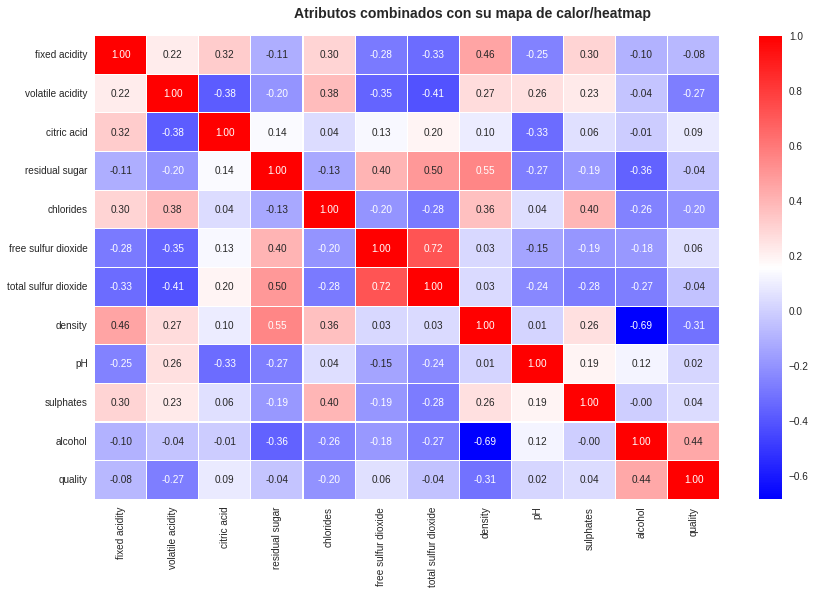

In [ ]:
fig, (ax) = plt.subplots(1, 1, figsize=(14,8))
hm = sns.heatmap(wines.corr(), ax=ax, cmap="bwr", annot=True, fmt='.2f', linewidths=.05)
fig.subplots_adjust(top=0.93)
fig.suptitle('Atributos combinados con su mapa de calor/heatmap', fontsize=14, fontweight='bold')

Aunque lo había olvidado, cabe anotar que **La correlación negativa entre alcohol y densidad es lógica porque _la densidad del alcohol es menor que el agua_**. Si hay algo que le baje la densidad al vino es el alcohol lógicamente, que a su vez aumenta su calidad.

Miremos la distribución en barras según el tipo de vino

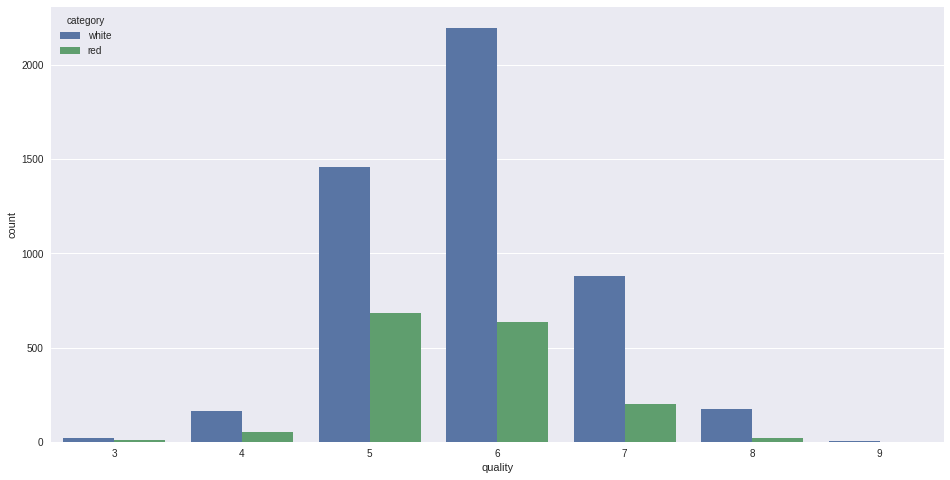

In [38]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(data=wines, x="quality", hue="category")
plt.show()

### Visualización 3D

El azúcar residual tiene una buena correlación positiva con el óxido de azufre libre y el óxido de azufre total. Sería interesante ver alguna graficación en 3D de estas 3 variables

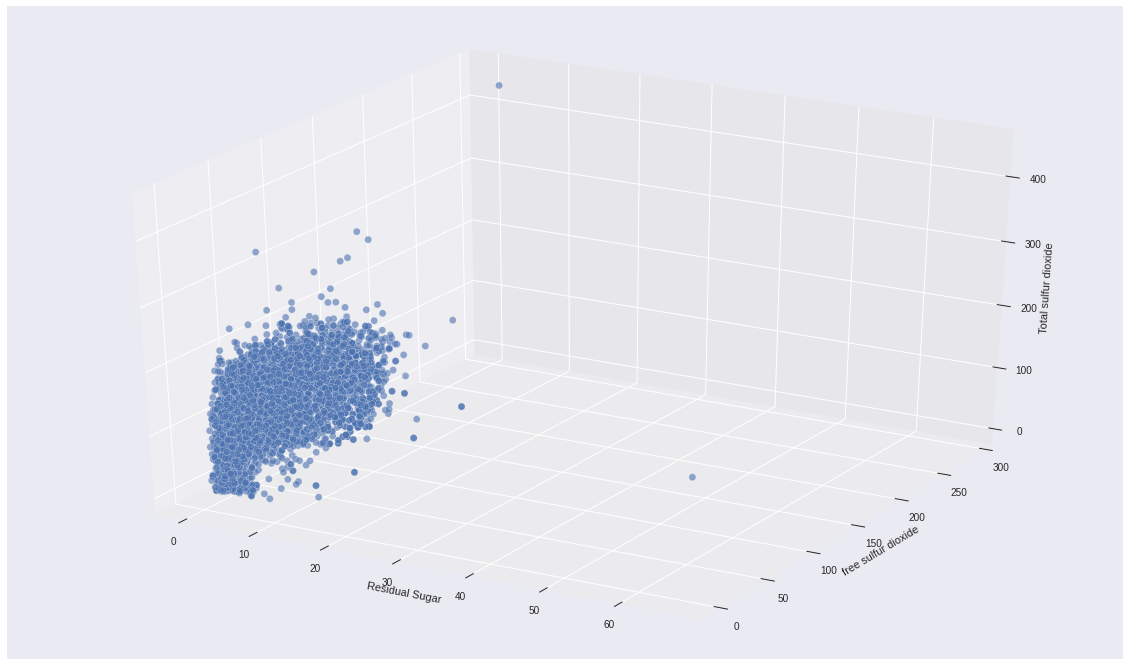

In [40]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = wines['residual sugar']
yscale = wines['free sulfur dioxide']
zscale = wines['total sulfur dioxide']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

# Seteamos los ejes
ax.set_xlabel('Residual Sugar')
ax.set_ylabel('free sulfur dioxide')
ax.set_zlabel('Total sulfur dioxide')
plt.show()

Cabe anotar que también se puede hacer con el pH y la acidez volátil y total pero no para el conjunto de todos los vinos sino para el de vino tinto en particular

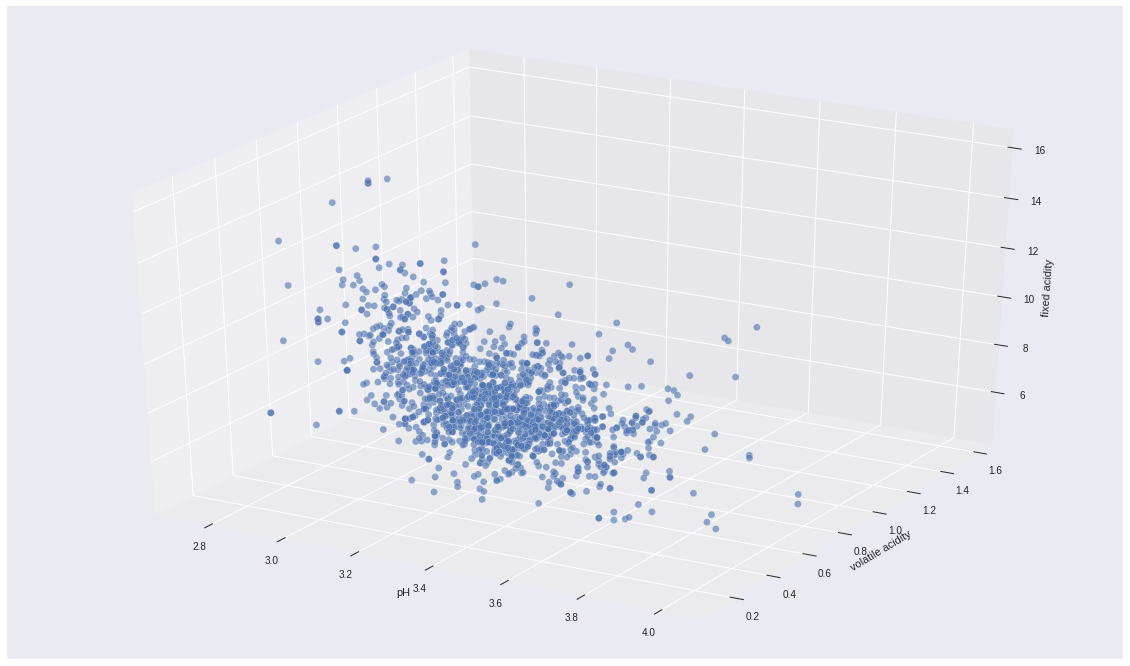

In [41]:
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

xscale = wines[wines['category'] == 'red']['pH']
yscale = wines[wines['category'] == 'red']['volatile acidity']
zscale = wines[wines['category'] == 'red']['fixed acidity']
ax.scatter(xscale, yscale, zscale, s=50, alpha=0.6, edgecolors='w')

# Seteamos los ejes
ax.set_xlabel('pH')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('fixed acidity')
plt.show()

Text(0.5, 1.05, 'Contenido de Dióxido de Azufre Libre - Acidez Fija - Dióxido de Azufre Total')

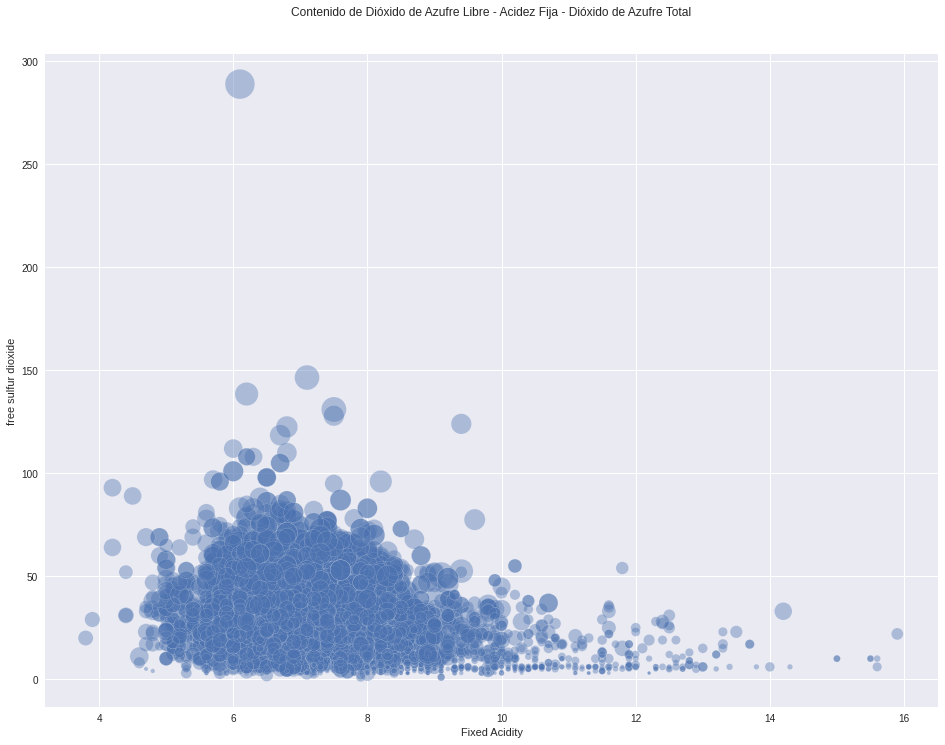

In [ ]:
fig = plt.figure(figsize=(16, 12))
plt.scatter(x = wines['fixed acidity'], y = wines['free sulfur dioxide'], s = wines['total sulfur dioxide'] * 2, alpha=0.4, edgecolors='w')
plt.xlabel('Fixed Acidity')
plt.ylabel('free sulfur dioxide')
plt.title('Contenido de Dióxido de Azufre Libre - Acidez Fija - Dióxido de Azufre Total', y=1.05)

## ¡Implementemos Una Regresión Logística!

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

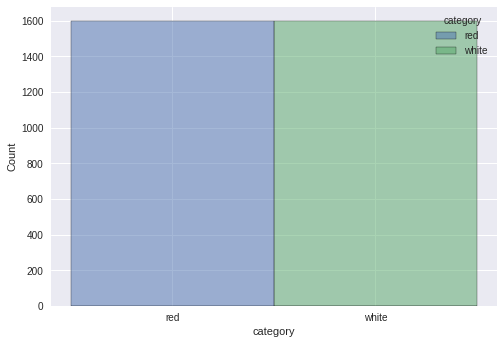

In [59]:
sns.histplot(data=wines, x='category', hue='category')

In [64]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category,quality_label
3193,7.0,0.23,0.33,5.8,0.040,25.0,136.0,0.99500,3.19,0.58,9.500000,6,0,medium
3194,6.3,0.23,0.21,5.1,0.035,29.0,142.0,0.99420,3.36,0.33,10.100000,7,0,medium
3195,7.3,0.67,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.066667,6,1,medium
3196,7.5,0.27,0.34,2.3,0.050,4.0,8.0,0.99510,3.40,0.64,11.000000,7,1,medium
3197,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.200000,5,1,low


In [60]:
wines = wines.sample(frac=1).reset_index(drop=True)

In [62]:
wines['category'].replace(to_replace='red', value=1, inplace=True)
wines['category'].replace(to_replace='white', value=0, inplace=True)

In [65]:
def normalizar(df):
    cols = ['residual sugar','alcohol', 'pH', 'total sulfur dioxide']
    df_salida = pd.DataFrame()
    for col in cols:
      df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df[cols]

In [66]:
vinos = normalizar(wines)
vinos.head()

,residual sugar,alcohol,pH,total sulfur dioxide
0,-0.317840,0.224106,0.799360,-1.173093
1,-0.539088,0.497529,1.470000,-1.381696
2,0.075491,-0.778449,0.372590,2.300959
3,-0.465339,-1.051872,-0.846754,-1.189139
4,-0.711170,-0.778449,1.043229,-1.317511


In [68]:
#label_quality = LabelEncoder()
#wines['quality_label'] = label_quality.fit_transform(wines['quality_label'])

# Separamos el 30% de los datos para prueba
x_train, x_test, y_train, y_test = train_test_split(vinos, wines['category'],test_size=0.30,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
print("Precisión de la regresión:", accuracy_score(y_test, prediction))

Precisión de la regresión: 0.9135416666666667


Las advertencias que salen son porque no usé el StandarScaler para normalizar la variable

In [69]:
wines[['residual sugar','alcohol', 'pH', 'total sulfur dioxide']].shape[1]

4

In [97]:
dnn_model = Sequential([
    Dense(16, input_shape=[vinos.shape[1]]),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [101]:
dnn_model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [102]:
dnn_model.fit(x=vinos,
          y=wines['category'], 
          epochs=50
)

Epoch 1/50
100/100 [==============================] - 1s 3ms/step - loss: 0.0974 - accuracy: 0.9644
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0968 - accuracy: 0.9647
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9650
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9647
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0958 - accuracy: 0.9640
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0959 - accuracy: 0.9650
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0963 - accuracy: 0.9662
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9659
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0962 - accuracy: 0.9640
Epoch 10/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9656

In [103]:
dnn_model.evaluate(x_test, y_test)

30/30 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9635


[0.10419561713933945, 0.9635416865348816]